In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import photoevolver as ph
from photoevolver.dev import planet as ph, models

## Planet structure from mass and radius

In [2]:
"""
First, we create a planet with e.g. radius 2.5 Earth radii and mass 5 Earth masses,
and has an orbital period of 5 days.
"""
planet = ph.Planet(mass = 5.0, radius = 2.5, period = 5 )

In [8]:
"""
We then provide the models that will define how the planet's core, envelope, and host star
behave.
"""
planet.set_models(
    core_model = models.core_otegi20,
    envelope_model = models.envelope_chen16,
    mass_loss_model = models.massloss_energy_limited,
    star_model = {
        'mass': 1.0,
        'lx'   : lambda state,mkw: 1e28, # erg/s
        'leuv' : lambda state,mkw: 1e28, # erg/s
        'lbol' : lambda state,mkw: 1e33
    },
    # model_args = dict(ot20_errors = False)
)


In [11]:
"""
Now that the planet's parameters and models have been set up,
you can solve for its internal structure, namely its core and envelope parameters.
"""
structure = planet.solve_structure(age=100.0)

"""
With this configuration, at the age of 100 Myr, the models tell us
the planet has a rocky core radius (`mcore`) of 1.6 Earth radii, about 60% of the planet's size,
and a gaseous envelope consisting on 1% of the planet's mass (`fenv`).
"""
structure

EvoState(mass=5.0, radius=2.5, mcore=4.947009238447555, rcore=1.6375577091951576, fenv=0.01059815231048909, renv=0.8624422908048424, period=5, sep=0.057224374150792415, mstar=1.0, lx=1e+28, leuv=1e+28, lbol=1e+33, age=100.0, tstep=None)

## Planet evolution

In [13]:
"""
Now we can evolve the planet's envelope under thermal contraction and evaporation
until the age of 2 Gyr with a fixed step size of 0.1 Myr.
This function `evolve` performs the computation and returns a pandas data frame
with columns for each simulation parameter, and rows that hold the value
of these parameters on each time step.
"""
evo_df = planet.evolve(start=100.0, end=2000.0, step=0.1, progressbar=True)
evo_df

100.000%|███████████████████████████████████████████████████████████████████████████████████▉| 1900.000/1900.0 [00:06<00:00]


,mass,radius,mcore,rcore,fenv,renv,period,sep,mstar,lx,leuv,lbol,age,tstep
0,5.000000,2.500000,4.947009,1.637558,0.010598,0.862442,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,100.0,0.1
1,5.000001,2.500011,4.947009,1.637558,0.010598,0.862453,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,100.0,0.1
2,5.000000,2.499949,4.947009,1.637558,0.010598,0.862391,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,100.1,0.1
3,4.999999,2.499887,4.947009,1.637558,0.010598,0.862329,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,100.2,0.1
4,4.999997,2.499825,4.947009,1.637558,0.010598,0.862268,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,100.3,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,4.980385,2.207562,4.947009,1.637558,0.006701,0.570005,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1999.6,0.1
18998,4.980384,2.207554,4.947009,1.637558,0.006701,0.569996,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1999.7,0.1
18999,4.980383,2.207545,4.947009,1.637558,0.006701,0.569988,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1999.8,0.1
19000,4.980382,2.207537,4.947009,1.637558,0.006701,0.569979,5,0.057224,1.0,1.000000e+28,1.000000e+28,1.000000e+33,1999.9,0.1


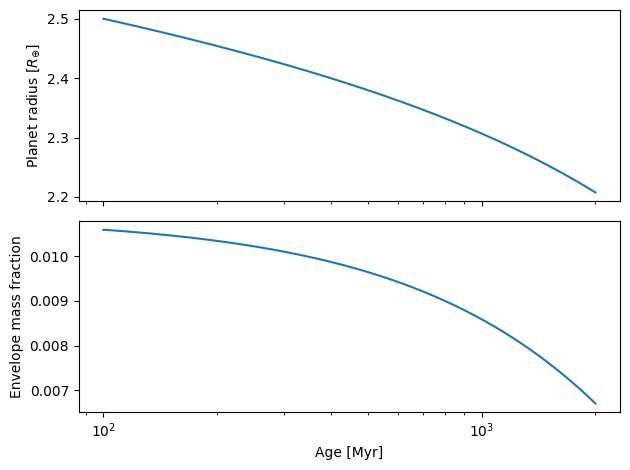

In [18]:
"""
Now we will plot the radius and mass evolution of the planet.
"""

fig, (axr, axm) = plt.subplots(nrows = 2, dpi = 100, sharex = True)

axr.set_xscale('log')
axm.set_xlabel('Age [Myr]')
axr.set_ylabel(r'Planet radius [$R_{\oplus}$]')
axm.set_ylabel(r'Envelope mass fraction')

axr.plot(evo_df['age'], evo_df['radius'])
axm.plot(evo_df['age'], evo_df['fenv'])

plt.tight_layout()

In [ ]:
"""
With mass loss enabled, the planet loses its envelope by the age of about 55 Myr.
Without mass loss, the envelope simply contracts following as it cools down.
"""
print()